<a href="https://www.kaggle.com/code/hikmatullahmohammadi/house-price-prediction-step-by-step?scriptVersionId=108121905" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Price Prediction (Linear Regression)

In this notebook, we will through the process of building a ML model to predict a house price
based on [this dataset](https://www.kaggle.com/datasets/shree1992/housedata).
We will take the following steps:
- Data exploration & preparation
- Modeling

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# input the dataset
df = pd.read_csv('../input/housedata/data.csv')

In [3]:
h_df = df.copy()

## 1) Data exploration & preparation

In [4]:
h_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# the number of rows (observations) and columns (features)
h_df.shape

(4600, 18)

In [6]:
# to see the features' datatypes and
# to make sure the datatypes are what we expect. 
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

We can see that the datatypes of floors, bathrooms and bedrooms are not of expected types
 (they can't be of type float).

In [7]:
# change the dtype of floors and bathrooms to 'int'
h_df[['floors', 'bathrooms', 'bedrooms']] = \
    h_df[['floors', 'bathrooms', 'bedrooms']].astype('int')
h_df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [8]:
# some statistical values to see how data are distributed (numerical features)
pd.set_option('display.float_format', lambda x: format(x, '.4f'))
h_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000
mean,551962.9885,3.4009,1.7889,2139.3470,14852.5161,1.4591,0.0072,0.2407,3.4517,1827.2654,312.0815,1970.7863,808.6083
std,563834.7025,0.9088,0.7522,963.2069,35884.4361,0.5522,0.0844,0.7784,0.6772,862.1690,464.1372,29.7318,979.4145
min,0.0000,0.0000,0.0000,370.0000,638.0000,1.0000,0.0000,0.0000,1.0000,370.0000,0.0000,1900.0000,0.0000
25%,322875.0000,3.0000,1.0000,1460.0000,5000.7500,1.0000,0.0000,0.0000,3.0000,1190.0000,0.0000,1951.0000,0.0000
50%,460943.4615,3.0000,2.0000,1980.0000,7683.0000,1.0000,0.0000,0.0000,3.0000,1590.0000,0.0000,1976.0000,0.0000
75%,654962.5000,4.0000,2.0000,2620.0000,11001.2500,2.0000,0.0000,0.0000,4.0000,2300.0000,610.0000,1997.0000,1999.0000
max,26590000.0000,9.0000,8.0000,13540.0000,1074218.0000,3.0000,1.0000,4.0000,5.0000,9410.0000,4820.0000,2014.0000,2014.0000


In [9]:
# observe the number of rows where the price is 0
(h_df['price']==0).sum(0)

49

In [10]:
h_df[h_df['price']==0].shape

(49, 18)

Since a house' price can't be 0, we consider them missing values

In [11]:
# replace 0s with NaN
h_df['price'].replace(0, np.nan, inplace=True)

In [12]:
h_df[h_df['price']==0].shape

(0, 18)

In [13]:
h_df.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [14]:
h_df['price'].describe()

count       4551.0000
mean      557905.8991
std       563929.8713
min         7800.0000
25%       326264.2857
50%       465000.0000
75%       657500.0000
max     26590000.0000
Name: price, dtype: float64

In [15]:
# replace the NaN values of price feature with its mean value
h_df['price'].fillna(value=h_df['price'].mean(), inplace=True)
h_df.isnull().sum().sum()

0

###### No more missing values

#### Handling outliers

We use IQR approach to handle outliers

In [16]:
h_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000
mean,557905.8991,3.4009,1.7889,2139.3470,14852.5161,1.4591,0.0072,0.2407,3.4517,1827.2654,312.0815,1970.7863,808.6083
std,560917.6337,0.9088,0.7522,963.2069,35884.4361,0.5522,0.0844,0.7784,0.6772,862.1690,464.1372,29.7318,979.4145
min,7800.0000,0.0000,0.0000,370.0000,638.0000,1.0000,0.0000,0.0000,1.0000,370.0000,0.0000,1900.0000,0.0000
25%,328158.9286,3.0000,1.0000,1460.0000,5000.7500,1.0000,0.0000,0.0000,3.0000,1190.0000,0.0000,1951.0000,0.0000
50%,468750.0000,3.0000,2.0000,1980.0000,7683.0000,1.0000,0.0000,0.0000,3.0000,1590.0000,0.0000,1976.0000,0.0000
75%,654962.5000,4.0000,2.0000,2620.0000,11001.2500,2.0000,0.0000,0.0000,4.0000,2300.0000,610.0000,1997.0000,1999.0000
max,26590000.0000,9.0000,8.0000,13540.0000,1074218.0000,3.0000,1.0000,4.0000,5.0000,9410.0000,4820.0000,2014.0000,2014.0000


From the above table, we see that price has some outliers. (extreme values) <br />
75% = 654_962.5000
max = 26_590_000

In [17]:
def replace_outliers_with_nan_iqr(df, feature, inplace=False):
    desired_feature = df[feature]
    
    q1, q3 = desired_feature.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [18]:
# replace outliers by NaN
replace_outliers_with_nan_iqr(h_df, 'price', inplace=True)
h_df.price.isnull().sum()

249

In [19]:
# replace the NaN values of price feature with its mean value
h_df.fillna(value=h_df['price'].mean(), inplace=True)
h_df.isnull().sum().sum()

0

In [20]:
h_df.price.describe()

count      4600.0000
mean     486880.0490
std      206833.9569
min        7800.0000
25%      328158.9286
50%      468750.0000
75%      600000.0000
max     1145000.0000
Name: price, dtype: float64

replaced the outliers in 'price' feature by its mean value

###### drop insignificant features:

In [21]:
# drop insignificant features
h_df.drop(['street', 'statezip', 'date', 'country'], axis=1, inplace=True)
h_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline
1,486880.0490,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle
2,342000.0000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent
3,420000.0000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond


In [22]:
# Change city names to numerric vlaues starting from 0 
h_df['city'], _ = pd.factorize(h_df['city'])

In [23]:
h_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,0
1,486880.0490,5,2,3650,9050,2,0,4,5,3370,280,1921,0,1
2,342000.0000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,2
3,420000.0000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,3
4,550000.0000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,4


In [24]:
h_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
price,1.0000,0.2917,0.3747,0.5105,0.0911,0.2349,0.0455,0.1813,0.0483,0.4616,0.2019,0.0567,-0.0683,-0.1093
bedrooms,0.2917,1.0000,0.4985,0.5949,0.0688,0.1574,-0.0035,0.1110,0.0251,0.4847,0.3342,0.1425,-0.0611,0.0901
bathrooms,0.3747,0.4985,1.0000,0.7113,0.1095,0.4637,0.0718,0.2034,-0.1188,0.6491,0.2703,0.3945,-0.1860,0.0607
sqft_living,0.5105,0.5949,0.7113,1.0000,0.2105,0.3410,0.1176,0.3110,-0.0628,0.8764,0.4472,0.2878,-0.1228,0.1347
sqft_lot,0.0911,0.0688,0.1095,0.2105,1.0000,-0.0051,0.0172,0.0739,0.0006,0.2165,0.0348,0.0507,-0.0227,0.1976
floors,0.2349,0.1574,0.4637,0.3410,-0.0051,1.0000,0.0180,0.0211,-0.3065,0.5173,-0.2533,0.5622,-0.2472,0.0236
waterfront,0.0455,-0.0035,0.0718,0.1176,0.0172,0.0180,1.0000,0.3609,0.0004,0.0789,0.0975,-0.0236,0.0086,0.0821
view,0.1813,0.1110,0.2034,0.3110,0.0739,0.0211,0.3609,1.0000,0.0631,0.1743,0.3216,-0.0645,0.0230,0.0195
condition,0.0483,0.0251,-0.1188,-0.0628,0.0006,-0.3065,0.0004,0.0631,1.0000,-0.1782,0.2006,-0.3997,-0.1868,-0.0339
sqft_above,0.4616,0.4847,0.6491,0.8764,0.2165,0.5173,0.0789,0.1743,-0.1782,1.0000,-0.0387,0.4085,-0.1604,0.1897


<AxesSubplot:>

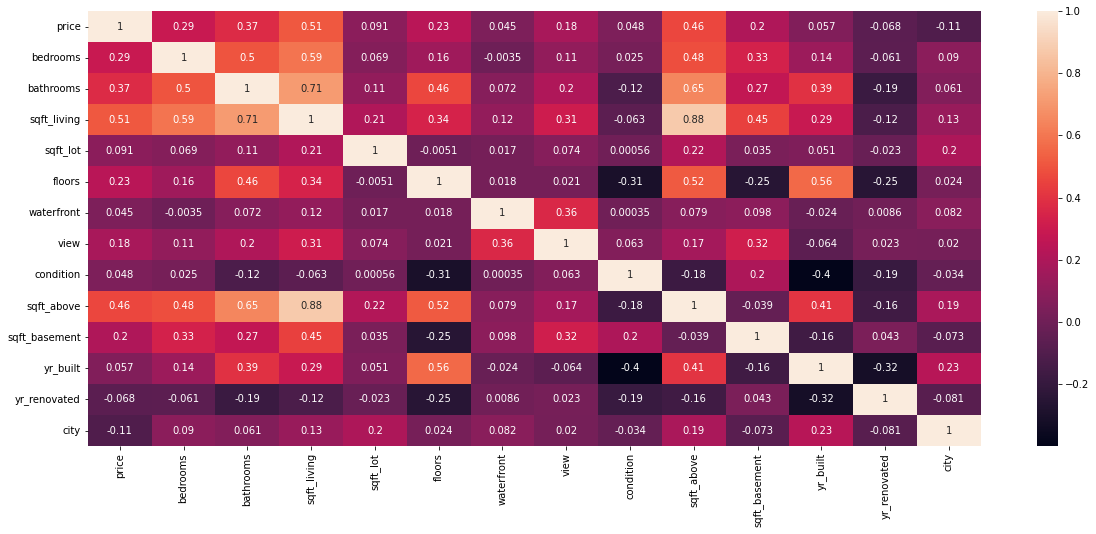

In [25]:
plt.figure(figsize=(20, 8))
sns.heatmap(h_df.corr(), annot=True)

In [26]:
X = h_df.copy()
y = h_df['price']


###### feature selection using mutual information

**Mutual Information (MI)** is a way to how every feature interact with the target variable
in this case 'price'. Here to interact means how a particular feature changes the target variable.
The higher the score, the stronger the interaction.<br />
*Note: Mutual Information only works with numerrical data*

In [27]:
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(X, y):
    mi = mutual_info_regression(X, y, random_state=10)
    mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi

In [28]:
# display Mutual Information scores of the features
mi_score = get_mi_score(X, y)
mi_score

price           6.0572
sqft_living     0.3119
city            0.3009
sqft_above      0.2180
bathrooms       0.1529
yr_built        0.0894
bedrooms        0.0856
sqft_lot        0.0824
view            0.0573
sqft_basement   0.0483
floors          0.0438
condition       0.0057
waterfront      0.0000
yr_renovated    0.0000
dtype: float64

<AxesSubplot:>

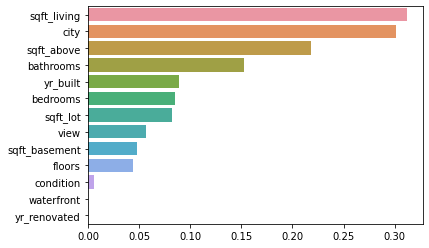

In [29]:
sns.barplot(y=mi_score.index[1:], x=mi_score[1:])

We can see that 'sqft_living' is the most effective feature as it has the highest mi score.<br />
And 'yr_renovated', 'condition' and 'waterfront' have the least effect on the target.<br />

drop  'yr_renovated', 'condition' and 'waterfront' features as their **mi score is: 0**

In [30]:
X.drop(['yr_renovated', 'condition', 'waterfront'], axis=1, inplace=True)

In [31]:
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,city
0,313000.0000,3,1,1340,7912,1,0,1340,0,1955,0
1,486880.0490,5,2,3650,9050,2,4,3370,280,1921,1
2,342000.0000,3,2,1930,11947,1,0,1930,0,1966,2
3,420000.0000,3,2,2000,8030,1,0,1000,1000,1963,3
4,550000.0000,4,2,1940,10500,1,0,1140,800,1976,4


### Exploratory Data Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

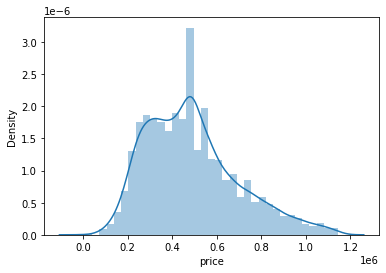

In [32]:
# how price is distributed
sns.distplot(h_df['price'])

In [33]:
def draw_boxenplot(feature):
    sns.set_style('whitegrid')
    ax = sns.boxenplot(x=h_df[feature], y=np.log(h_df['price']))
    ax.set_ylabel('price (log)')
    ax.set(title=f'{feature} VS price')

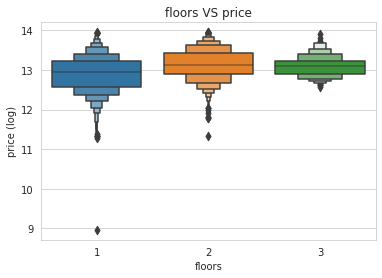

In [34]:
# floors vs price
draw_boxenplot('floors')

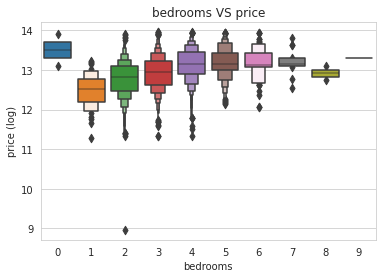

In [35]:
# bedrooms vs price
draw_boxenplot('bedrooms')

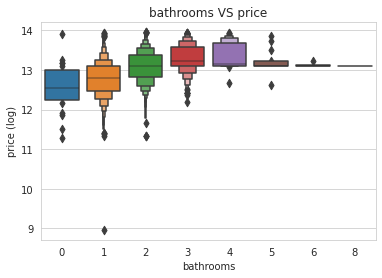

In [36]:
# bathrooms vs price
draw_boxenplot('bathrooms')

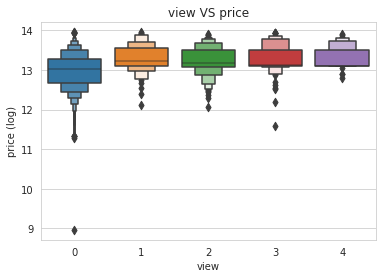

In [37]:
# view vs price
draw_boxenplot('view')

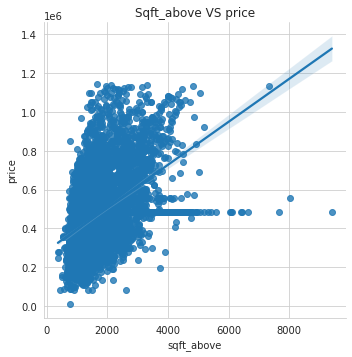

In [38]:
ax = sns.lmplot(data=h_df, x='sqft_above', y='price')
ax.set(title = 'Sqft_above VS price')

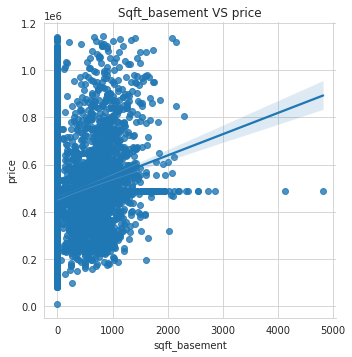

In [39]:
ax = sns.lmplot(data=h_df, x='sqft_basement', y='price')
ax.set(title = 'Sqft_basement VS price')

In [40]:
# we can see that it has some extreme values. so let's handle them
replace_outliers_with_nan_iqr(h_df, 'sqft_basement', inplace=True)

# replace the NaN values of 'sqft_basement' feature with its mean value
h_df['sqft_basement'].fillna(value=h_df['sqft_basement'].mean(), inplace=True)
h_df.isnull().sum().sum()

0

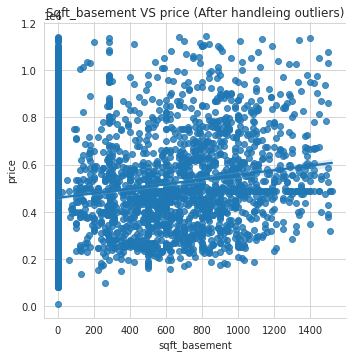

In [41]:
# After handleing outliers
ax = sns.lmplot(data=h_df, x='sqft_basement', y='price')
ax.set(title = 'Sqft_basement VS price (After handleing outliers)')

In [42]:
X = X.drop('price', axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,city
0,3,1,1340,7912,1,0,1340,0,1955,0
1,5,2,3650,9050,2,4,3370,280,1921,1
2,3,2,1930,11947,1,0,1930,0,1966,2
3,3,2,2000,8030,1,0,1000,1000,1963,3
4,4,2,1940,10500,1,0,1140,800,1976,4


# 2) Modeling

In [43]:
# split the trian and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [44]:
# fit the dataset to the model
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
# make a prediction
y_pred = model.predict(X_test)
y_pred

array([352603.5       , 541392.54152108, 623841.02048993, ...,
       567420.46279961, 402944.        , 297170.35000004])

In [46]:
# Check the accuracy of the model
# RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('RMSE: ', rmse)

RMSE:  137331.66023308467


#### Thank you